load network


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from matplotlib_venn import venn2, venn3
#pd.read_csv('data/matrix/'+netfile, index_col=0)

In [2]:
def get_graph(netfile, path='data/matrix/'):
    G = nx.Graph()
    with open(path+netfile) as f:
        plants = []
        insects = f.readline()[1:].strip().split(',')
        G.add_nodes_from(insects, bipartite=0)
        for line in f.readlines():
            line = line.strip().split(',')
            plant = line.pop(0)
            plants.append(plant)
            G.add_node(plant, bipartite=1)
            #print plant, line
            for i in range(len(line)):
                if line[i]!='0': G.add_edge(insects[i], plant, weight=int(line[i]))
    return G

Calculate the number of nodes, edges and interactions by network

In [3]:
df = pd.DataFrame(columns=['nodes','insects','plants','interactions','observations','singletons'])

for f in listdir('data/matrix/'):
    name = f.replace('data_clean_matrix_','').replace('.csv','')
    G = get_graph(f)
    wei = nx.get_edge_attributes(G, 'weight').values()
    ins = [n for n,d in G.nodes(data=True) if d['bipartite']==0]
    pla = [n for n,d in G.nodes(data=True) if d['bipartite']==1]
    l = [len(G.nodes()), len(ins), len(pla), 
         len(wei), sum(wei), wei.count(1)]
    #print(l, wei)
    df.loc[name]=l
df

,nodes,insects,plants,interactions,observations,singletons
areanatural,193,148,45,305,527,218
secas,140,106,34,209,391,150
heladas,112,78,34,146,299,111
huerto,195,132,63,314,774,209
huerto_lluvias,108,68,40,143,335,90
huerto_heladas,66,42,24,84,207,60
areanatural_secas,78,67,11,94,159,70
areanatural_lluvias,107,75,32,160,276,109
all,310,210,100,609,1301,421
huerto_secas,91,67,24,117,232,83


Degree distribution

In [4]:
G = get_graph('data_clean_matrix_all.csv')
wei = nx.get_edge_attributes(G, 'weight').values()
ins = [n for n,d in G.nodes(data=True) if d['bipartite']==0]
pla = [n for n,d in G.nodes(data=True) if d['bipartite']==1]

insects 6.195 30.554
 !apimel 4.12 5.771
{1: 86, 2: 40, 3: 22, 4: 15, 5: 7, 6: 6, 7: 4, 8: 4, 9: 1, 10: 4, 11: 4, 12: 1, 16: 2, 17: 1, 19: 2, 20: 3, 21: 1, 22: 2, 23: 1, 31: 1, 32: 1, 35: 1}
plants 6.09 6.754
{1: 26, 2: 5, 3: 15, 4: 10, 5: 9, 6: 4, 7: 6, 8: 5, 9: 3, 42: 1, 11: 1, 12: 2, 13: 2, 15: 1, 16: 2, 17: 3, 20: 1, 24: 1, 27: 1, 28: 1, 10: 1}


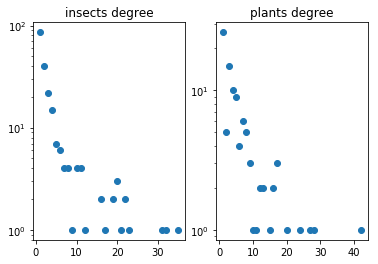

In [5]:
i_degree = sorted([w for i,w in G.degree(ins, weight='weight')], reverse=True)
print 'insects', np.round(np.mean(i_degree),3), np.round(np.std(i_degree),3)
i_degree = i_degree[1:] #remove apimel
print ' !apimel', np.round(np.mean(i_degree),3), np.round(np.std(i_degree),3)
i_degree = {i:i_degree.count(i) for i in set(i_degree)}
print i_degree

plt.subplot(121)
plt.plot(i_degree.keys(), i_degree.values(), 'o')
plt.yscale('log')
plt.title('insects degree')

i_degree = sorted([w for i,w in G.degree(pla)], reverse=True)
print 'plants', np.round(np.mean(i_degree),3), np.round(np.std(i_degree),3)
i_degree = {i:i_degree.count(i) for i in set(i_degree)}
print i_degree

plt.subplot(122)
plt.plot(i_degree.keys(), i_degree.values(), 'o')
plt.yscale('log')
plt.title('plants degree')

plt.show()

apiel 52 440 8.461538461538462


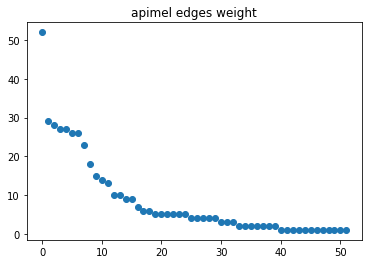

In [6]:
apimel_edges = G.edges(['apimel'], data=True)
apimel_edges = sorted([e[2].values()[0] for e in apimel_edges])
#for i in set(apimel_edges): print i, apimel_edges.count(i)
print 'apiel', len(apimel_edges), sum(apimel_edges), np.mean(apimel_edges)

plt.plot(apimel_edges[::-1], 'o')
plt.title('apimel edges weight')
plt.show()

Edges in different seasons

In [7]:
edges = {}
for f in listdir('data/matrix/'):
    name = f.replace('data_clean_matrix_','').replace('.csv','')
    G = get_graph(f)
    edges[name] = set(['-'.join(sorted(e)) for e in  G.edges() ])
    #print(name, len(edges[name]))
edges.keys()


['huerto_heladas',
 'all',
 'heladas',
 'huerto_secas',
 'huerto',
 'huerto_lluvias',
 'lluvias',
 'areanatural_heladas',
 'areanatural_secas',
 'secas',
 'areanatural',
 'areanatural_lluvias']

609


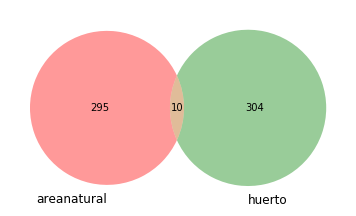

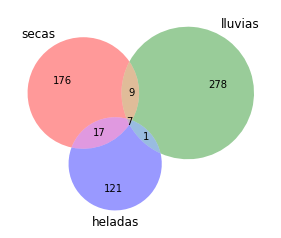

In [8]:
print len(edges['all'])
labels = ['areanatural','huerto']
data = [edges[l] for l in labels]
venn2(data, set_labels=labels)
plt.show()

labels = ['secas','lluvias','heladas']
data = [edges[l] for l in labels]
venn3(data, set_labels=labels)
plt.show()